# Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import datetime
import matplotlib.dates as mdates

In [2]:
# Creat path
path = r'D:\ドキュメント\Study\CareerFoundry\Achievement 6'

# Import dataset

In [3]:
df = pd.read_csv(os.path.join(path, '02 Data','Prepared Data','vehicle loan customer_cleansed.csv'), index_col = False)

In [4]:
pd.set_option('display.max_columns', 50)

In [5]:
df.dtypes

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
Date.of.Birth                           object
Employment.Type                         object
DisbursalDate                           object
State_ID                                 int64
MobileNo_Avl_Flag                         bool
Aadhar_flag                               bool
PAN_flag                                  bool
VoterID_flag                              bool
Driving_flag                              bool
Passport_flag                             bool
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACCTS                          int64
PRI.ACTIVE.ACCTS                         int64
PRI.OVERDUE.ACCTS                        int64
PRI.CURRENT.BALANCE                      int64
PRI.SANCTIONE

In [6]:
#change data type
df.DisbursalDate = pd.to_datetime(df['DisbursalDate']).dt.strftime("%Y-%m")

## 2. Use the questions you defined in the previous task to pick out variables from your data set suitable for your exploratory visual analysis.

### EDA

In [7]:
pd.options.display.float_format = '{:.2f}'.format

In [8]:
# Creat the data frame of the non defaulted froup
df1 = df[df['loan_default']==False]

In [9]:
# Creat the data frame of the defaulted froup
df2 = df[df['loan_default']==True]

In [10]:
df.dtypes

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
Date.of.Birth                           object
Employment.Type                         object
DisbursalDate                           object
State_ID                                 int64
MobileNo_Avl_Flag                         bool
Aadhar_flag                               bool
PAN_flag                                  bool
VoterID_flag                              bool
Driving_flag                              bool
Passport_flag                             bool
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACCTS                          int64
PRI.ACTIVE.ACCTS                         int64
PRI.OVERDUE.ACCTS                        int64
PRI.CURRENT.BALANCE                      int64
PRI.SANCTIONE

### Is there any specific financial behaver for defaulted customers, such a s times using the loan, cost they pay, employment type, etc.?

<AxesSubplot:>

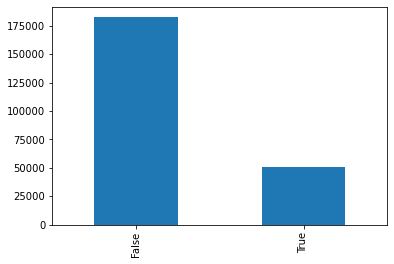

In [11]:
# The number of defaulted customer 
df.loan_default.value_counts().plot(kind='bar')

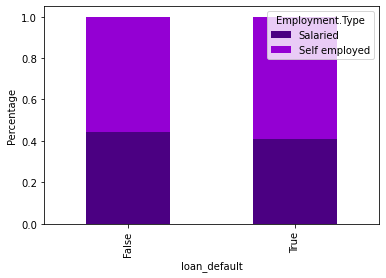

In [12]:
crosstab = pd.crosstab(df['loan_default'], df['Employment.Type'], normalize='index')
ax = plt.subplot()
crosstab.plot.bar(stacked=True, color=['indigo','darkviolet'], ax=ax)
ax.set_ylabel('Percentage')
plt.show()

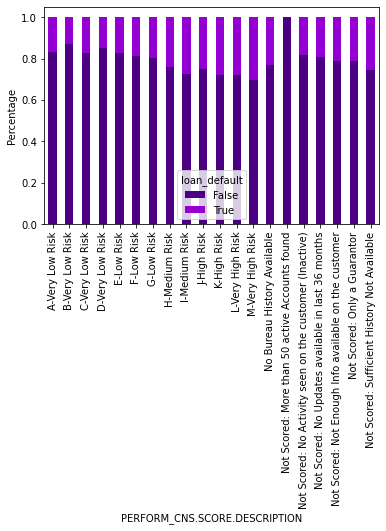

In [13]:
crosstab_1 = pd.crosstab(df['PERFORM_CNS.SCORE.DESCRIPTION'], df['loan_default'],normalize='index')
ax = plt.subplot()
crosstab_1.plot.bar(stacked=True, color=['indigo','darkviolet'], ax=ax)
ax.set_ylabel('Percentage')
plt.show()

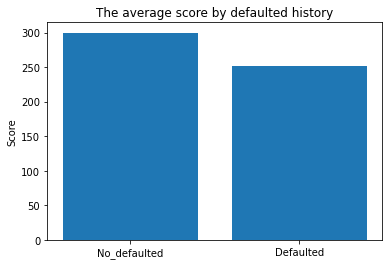

In [14]:
y1= df1['PERFORM_CNS.SCORE'].mean()
y2= df2['PERFORM_CNS.SCORE'].mean()
x = ['No_defaulted','Defaulted']
y = [y1, y2] 
y_position = np.arange(len(x))
 
plt.bar(x, y)
plt.xticks(y_position, x)
plt.ylabel('Score')
plt.title('The average score by defaulted history')
plt.show()

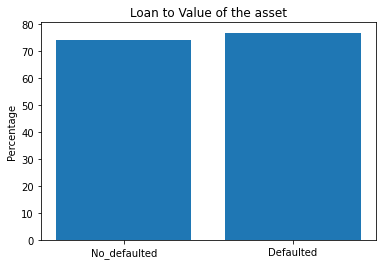

In [15]:
y1= df1['ltv'].mean()
y2= df2['ltv'].mean()
x = ['No_defaulted','Defaulted']
y = [y1, y2] 
y_position = np.arange(len(x))
 
plt.bar(x, y)
plt.xticks(y_position, x)
plt.ylabel('Percentage')
plt.title('Loan to Value of the asset')
plt.show()

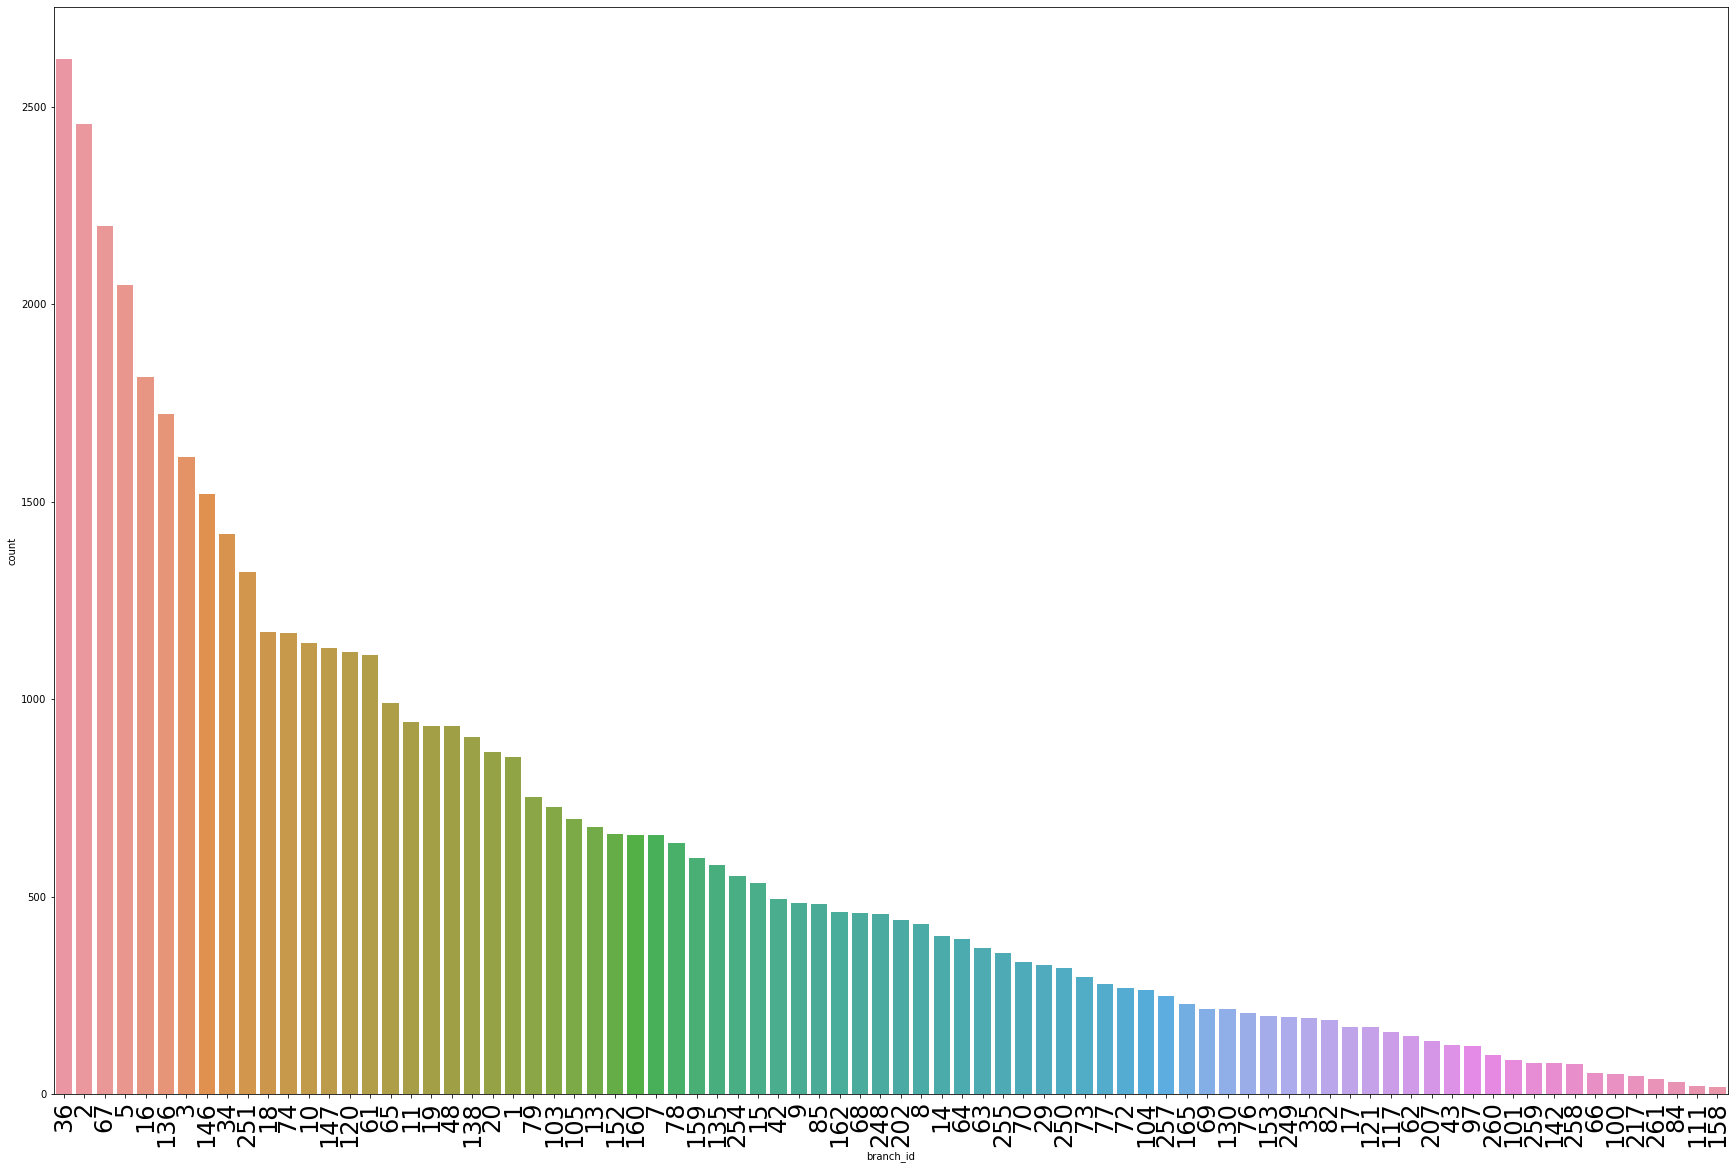

In [16]:
# The number of defaulted customer by branch
plt.figure(figsize=(30, 20))
ax = sns.countplot(x='branch_id', data=df2,order=df2['branch_id'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=24, rotation=90)
plt.show()

In [17]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
UniqueID,182543.00,534700.01,67551.16,417428.00,476510.00,533986.00,592566.50,671084.00
disbursed_amount,182543.00,53826.47,13140.70,13320.00,46369.00,53303.00,59947.00,990572.00
asset_cost,182543.00,75722.81,19015.00,37000.00,65680.00,70845.00,78999.00,1628992.00
ltv,182543.00,74.15,11.68,10.03,68.02,76.00,83.16,95.00
branch_id,182543.00,71.83,69.19,1.00,13.00,61.00,121.00,261.00
State_ID,182543.00,7.15,4.45,1.00,4.00,6.00,9.00,22.00
PERFORM_CNS.SCORE,182543.00,299.78,342.88,0.00,0.00,15.00,690.00,890.00
PRI.NO.OF.ACCTS,182543.00,2.54,5.26,0.00,0.00,1.00,3.00,354.00
PRI.ACTIVE.ACCTS,182543.00,1.08,2.01,0.00,0.00,0.00,1.00,144.00
PRI.OVERDUE.ACCTS,182543.00,0.14,0.53,0.00,0.00,0.00,0.00,25.00


In [18]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
UniqueID,50611.00,540309.06,70831.88,417439.00,477773.00,544405.00,604090.50,658671.00
disbursed_amount,50611.00,56270.47,12150.26,13369.00,49303.00,55459.00,61947.00,191392.00
asset_cost,50611.00,76378.18,18680.50,37000.00,65894.00,71326.00,80061.50,281164.00
ltv,50611.00,76.88,10.33,15.30,72.06,79.06,84.68,95.00
branch_id,50611.00,76.94,71.96,1.00,16.00,64.00,135.00,261.00
State_ID,50611.00,7.67,4.56,1.00,4.00,6.00,12.00,22.00
PERFORM_CNS.SCORE,50611.00,252.24,318.83,0.00,0.00,0.00,610.00,879.00
PRI.NO.OF.ACCTS,50611.00,2.09,5.04,0.00,0.00,0.00,2.00,453.00
PRI.ACTIVE.ACCTS,50611.00,0.89,1.67,0.00,0.00,0.00,1.00,35.00
PRI.OVERDUE.ACCTS,50611.00,0.20,0.60,0.00,0.00,0.00,0.00,18.00


### Which area has the highest number of the default?

<AxesSubplot:>

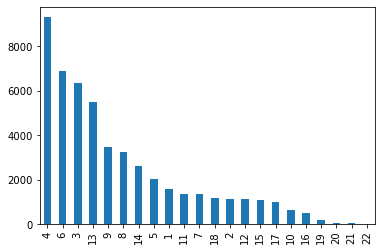

In [20]:
# The number of defaulted customer by state ID
df2.State_ID.value_counts().plot.bar()

### When are customers defaulted the most?

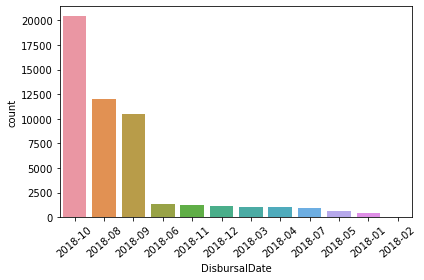

In [21]:
# The number of defaulted customer by month
ax = sns.countplot(x='DisbursalDate', data=df2,order=df2['DisbursalDate'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40)
plt.tight_layout()
plt.show()

In [22]:
df.head().T

,0,1,2,3,4
UniqueID,420825,537409,417566,624493,539055
disbursed_amount,50578,47145,53278,57513,52378
asset_cost,58400,65550,61360,66113,60300
ltv,89.55,73.23,89.63,88.48,88.39
branch_id,67,67,67,67,67
Date.of.Birth,01-01-84,31-07-85,24-08-85,30-12-93,09-12-77
Employment.Type,Salaried,Self employed,Self employed,Self employed,Self employed
DisbursalDate,2018-03,2018-09,2018-01,2018-10,2018-09
State_ID,6,6,6,6,6
MobileNo_Avl_Flag,True,True,True,True,True


## 3. Create a correlation matrix heatmap (colored).

In [23]:
# Create a correlation matrix using pandas
df.corr()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,State_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
UniqueID,1.00,0.15,0.14,-0.03,-0.00,-0.06,nan,-0.00,-0.01,0.01,-0.03,-0.00,-0.01,-0.01,-0.02,-0.01,-0.01,-0.00,-0.00,-0.01,-0.00,-0.01,0.02,0.03
disbursed_amount,0.15,1.00,0.75,0.38,0.02,-0.02,nan,-0.02,0.01,0.01,0.00,0.01,0.01,0.03,0.04,0.02,0.02,0.01,0.01,0.00,0.04,0.02,0.04,0.08
asset_cost,0.14,0.75,1.00,-0.30,0.02,-0.03,nan,-0.09,0.05,0.08,0.02,0.01,-0.05,-0.03,-0.02,-0.01,-0.00,-0.00,-0.00,-0.00,-0.02,-0.01,-0.02,0.01
ltv,-0.03,0.38,-0.30,1.00,0.01,0.00,nan,0.11,-0.04,-0.10,-0.02,0.00,0.08,0.09,0.09,0.05,0.03,0.01,0.01,0.01,0.08,0.04,0.09,0.10
branch_id,-0.00,0.02,0.02,0.01,1.00,0.19,nan,-0.04,0.03,0.02,-0.02,-0.01,-0.02,-0.01,-0.01,-0.01,-0.00,-0.00,-0.00,0.00,-0.01,-0.00,-0.00,0.03
State_ID,-0.06,-0.02,-0.03,0.00,0.19,1.00,nan,-0.17,0.11,0.15,0.03,-0.00,-0.04,-0.01,-0.02,-0.01,-0.01,-0.00,-0.00,0.02,-0.01,-0.00,-0.02,0.05
MobileNo_Avl_Flag,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Aadhar_flag,-0.00,-0.02,-0.09,0.11,-0.04,-0.17,nan,1.00,-0.20,-0.87,-0.28,-0.08,0.07,0.05,0.06,0.02,0.03,0.01,0.01,0.01,0.06,0.02,0.03,-0.04
PAN_flag,-0.01,0.01,0.05,-0.04,0.03,0.11,nan,-0.20,1.00,0.18,-0.01,0.00,0.01,-0.01,0.00,-0.01,-0.00,-0.00,-0.00,-0.01,0.01,-0.00,0.02,0.00
VoterID_flag,0.01,0.01,0.08,-0.10,0.02,0.15,nan,-0.87,0.18,1.00,-0.05,-0.02,-0.07,-0.06,-0.07,-0.03,-0.03,-0.02,-0.02,-0.02,-0.06,-0.03,-0.02,0.04


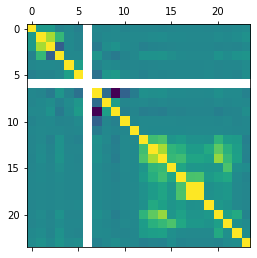

In [24]:
# Create a correlation heatmap using matplotlib

plt.matshow(df.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

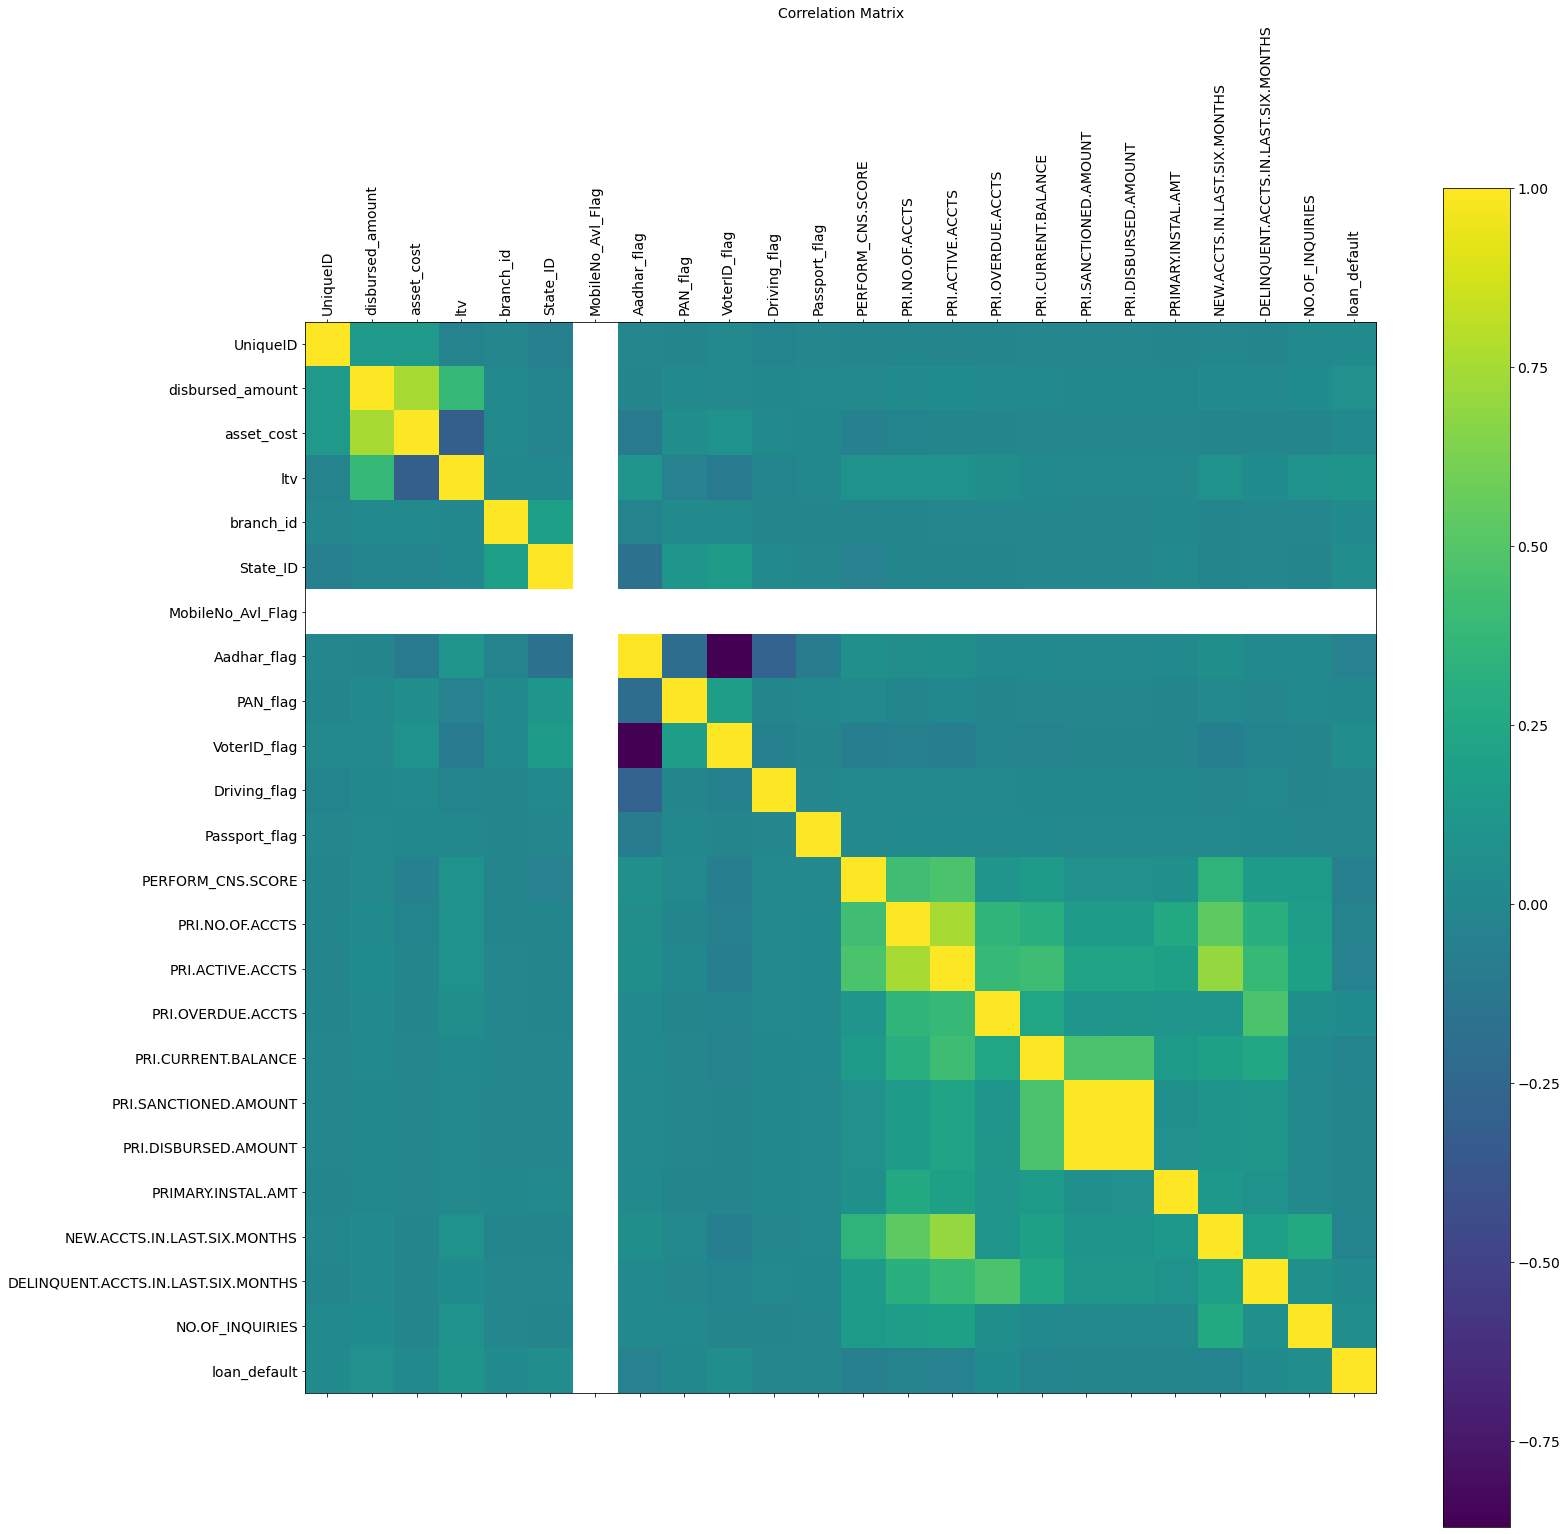

In [25]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(24, 24)) # figure size 
plt.matshow(df.corr(), fignum=f.number) # type of plot
df2 = df.corr()
n = len(df2.columns)
plt.gca().set_xticks(range(n))
plt.gca().set_xticklabels(df2.columns, fontsize=14, rotation=90)
plt.gca().set_yticks(range(n))
plt.gca().set_yticklabels(df2.columns,  fontsize=14)
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title


In [26]:
# Create a subset excluding the "Date" and "No" columns

sub = df[['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'Date.of.Birth', 'Employment.Type', 'DisbursalDate', 'State_ID', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default']]

In [27]:
sub

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,01-01-84,Salaried,2018-03,6,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,False
1,537409,47145,65550,73.23,67,31-07-85,Self employed,2018-09,6,598,I-Medium Risk,1,1,1,27600,50200,50200,1991,0,1,1yrs 11mon,1yrs 11mon,0,True
2,417566,53278,61360,89.63,67,24-08-85,Self employed,2018-01,6,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,False
3,624493,57513,66113,88.48,67,30-12-93,Self employed,2018-10,6,305,L-Very High Risk,3,0,0,0,0,0,31,0,0,0yrs 8mon,1yrs 3mon,1,True
4,539055,52378,60300,88.39,67,09-12-77,Self employed,2018-09,6,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,626432,63213,105405,60.72,34,01-08-88,Salaried,2018-10,6,735,D-Very Low Risk,4,3,0,390443,416133,416133,4084,0,0,1yrs 9mon,3yrs 3mon,0,False
233150,606141,73651,100600,74.95,34,05-12-88,Self employed,2018-10,6,825,A-Very Low Risk,1,0,0,0,0,0,1565,0,0,0yrs 6mon,0yrs 6mon,0,False
233151,613658,33484,71212,48.45,77,01-06-76,Salaried,2018-10,4,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,False
233152,548084,34259,73286,49.10,77,26-03-94,Salaried,2018-09,4,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,False


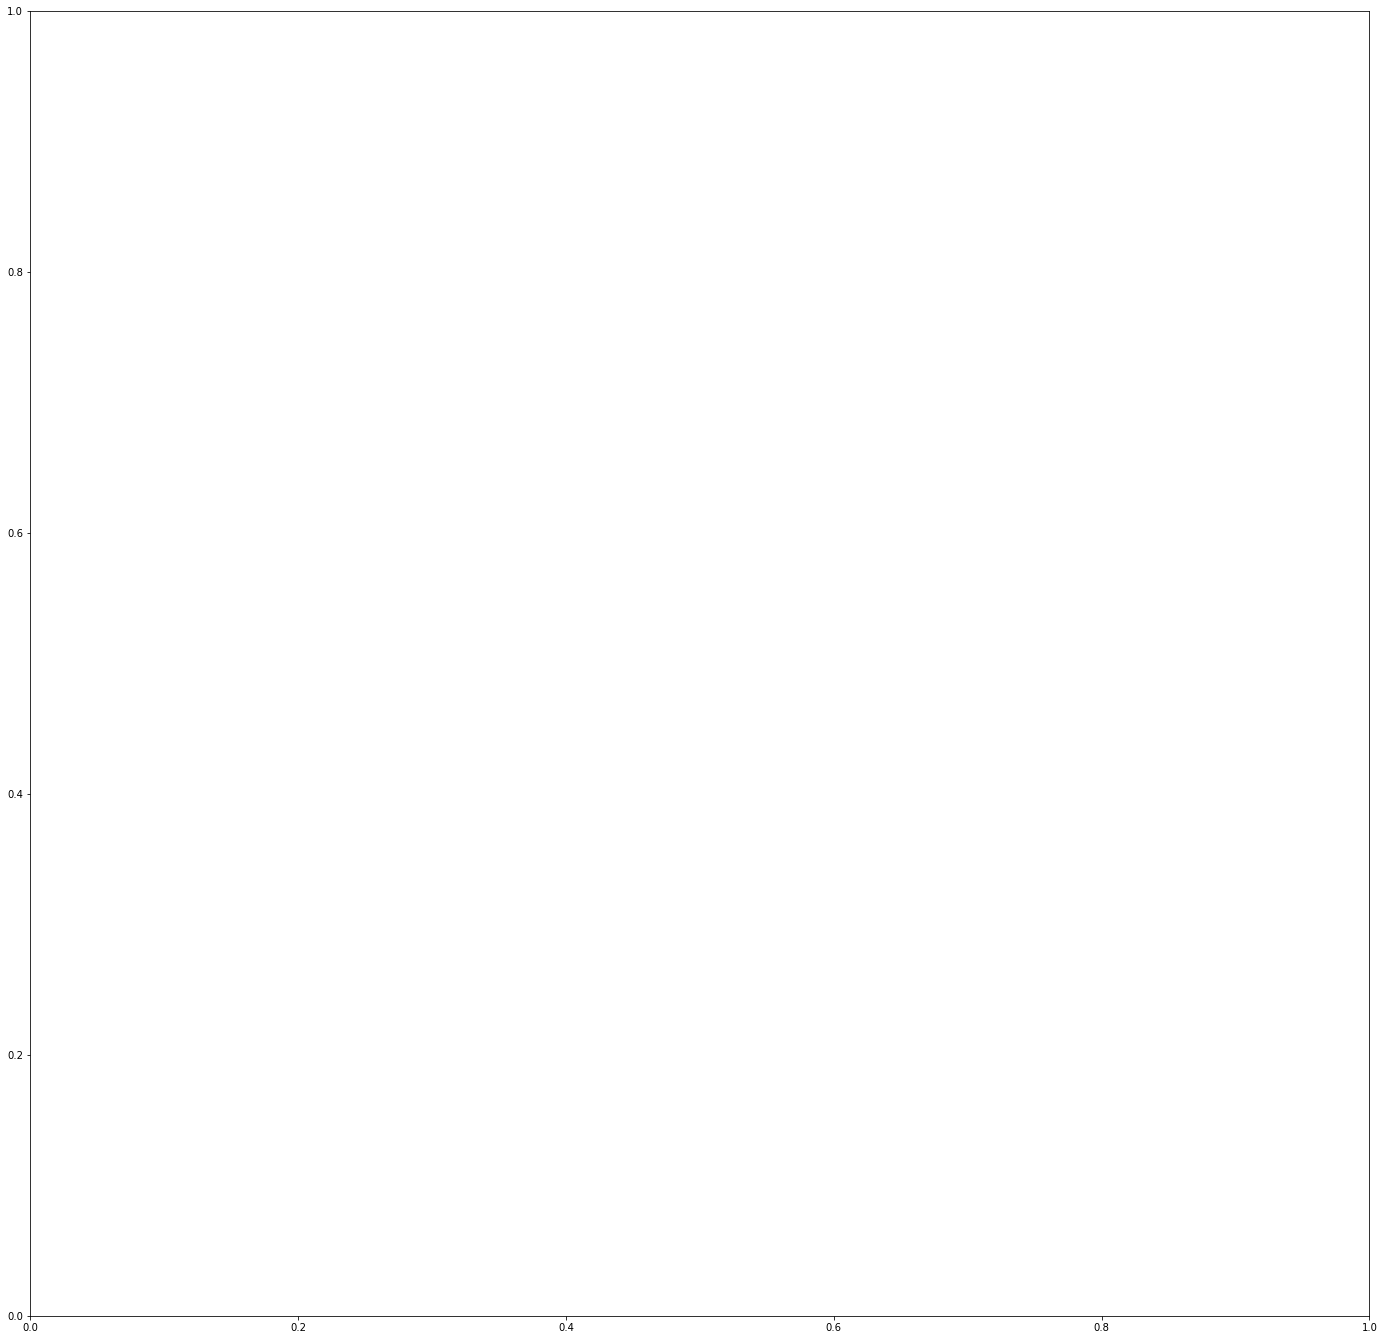

In [28]:
# Create a subplot with matplotlib.

f,ax = plt.subplots(figsize=(24,24))

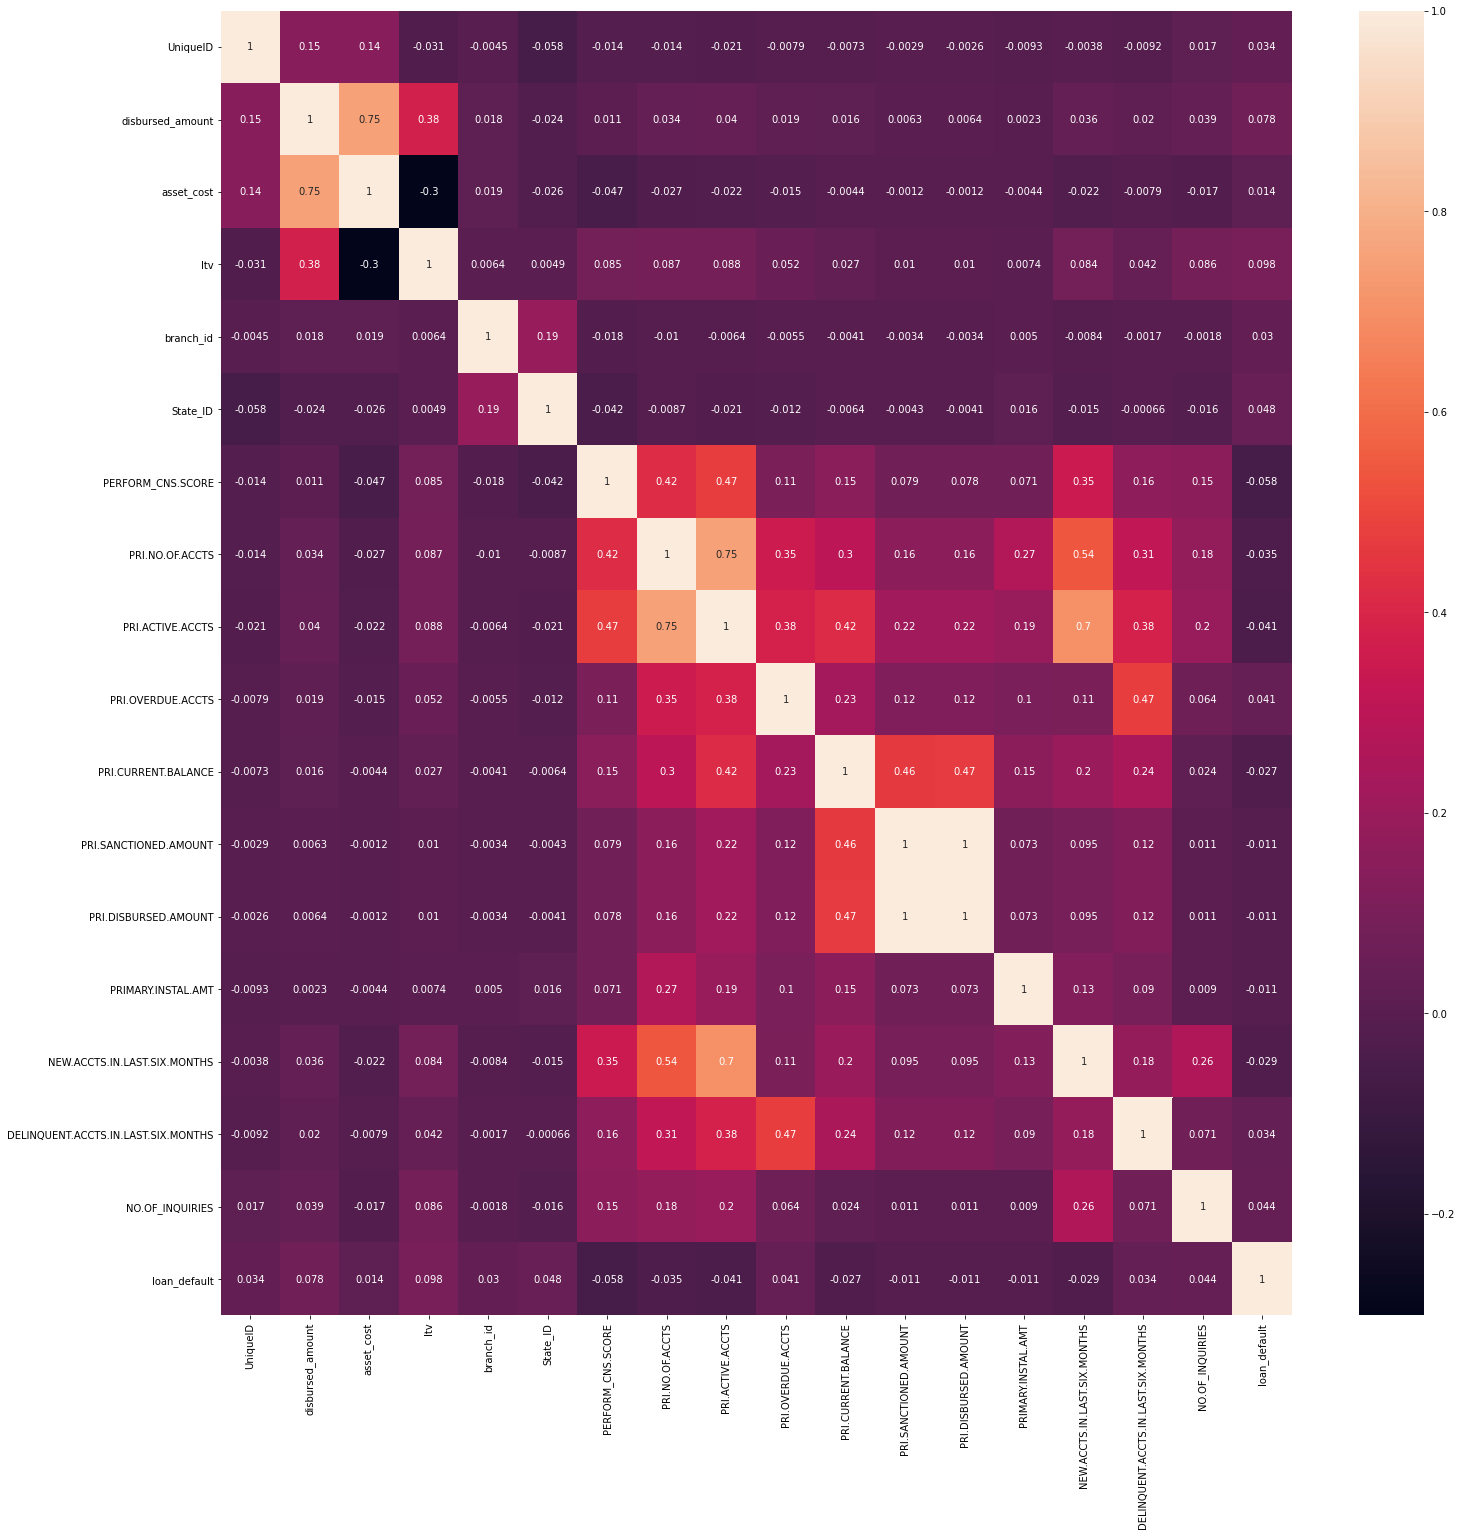

In [29]:
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.

corr = sns.heatmap(sub.corr(), annot = True, ax = ax) 

# The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.
corr.figure

## 4. Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.

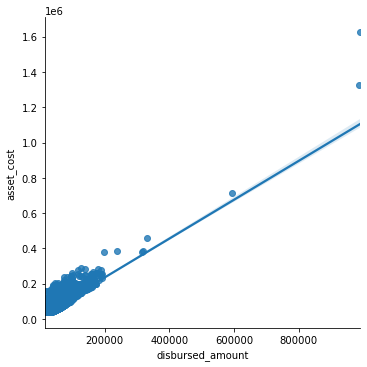

In [30]:
# Create a scatterplot for the "house age" and "price per unit" columns in seaborn

sns.lmplot(x = 'disbursed_amount', y = 'asset_cost', data = df)

## 5. Create a pair plot of the entire data set.

In [31]:
# Keep only the variables you want to use in the pair plot

sub_2 = sub[['disbursed_amount', 'asset_cost', 'PERFORM_CNS.SCORE', 'NO.OF_INQUIRIES']]

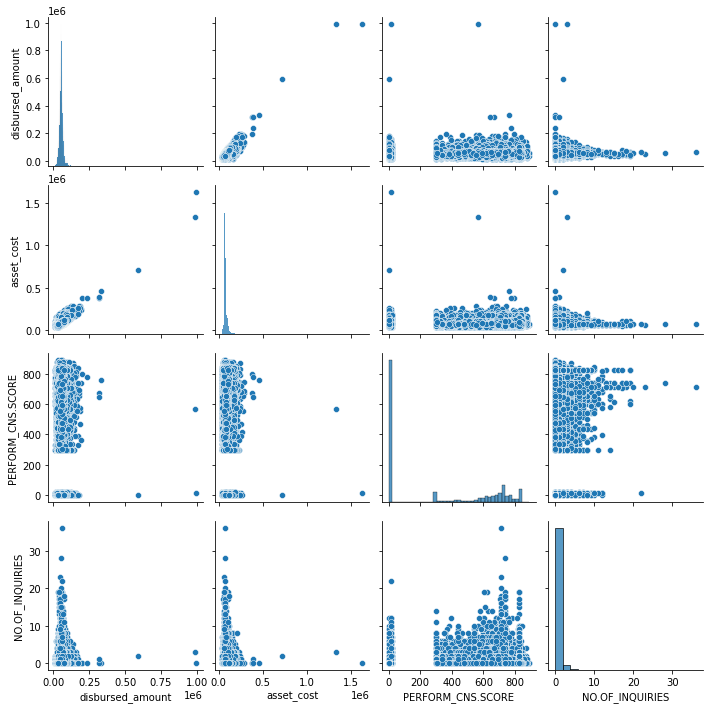

In [32]:
# Create a pair plot 

g = sns.pairplot(sub_2)

## 6. Create a categorical plot and interpret the results.

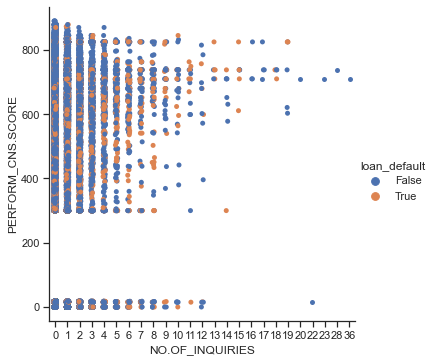

In [33]:
sns.set(style="ticks")
g1 = sns.catplot(x="NO.OF_INQUIRIES", y="PERFORM_CNS.SCORE", hue="loan_default", data=df)